In [62]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [4]:
news_df = pd.read_csv('train.csv')

In [5]:
news_df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [6]:
news_df.shape

(72134, 4)

In [7]:
news_df.isna().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [8]:
news_df = news_df.fillna(' ')

In [9]:
news_df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [16]:
news_df['content'] = " "+news_df['title']

In [17]:
news_df

,Unnamed: 0,title,text,label,content
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threa...
1,1,,Did they post their votes for Hillary already?,1,
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS M...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chr..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terri...
...,...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U...
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apolo...
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Cam...
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,Trump tussle gives unpopular Mexican leader m...


In [18]:
news_df['content']

0         LAW ENFORCEMENT ON HIGH ALERT Following Threa...
1                                                         
2         UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS M...
3         Bobby Jindal, raised Hindu, uses story of Chr...
4         SATAN 2: Russia unvelis an image of its terri...
                               ...                        
72129     Russians steal research on Trump in hack of U...
72130      WATCH: Giuliani Demands That Democrats Apolo...
72131     Migrants Refuse To Leave Train At Refugee Cam...
72132     Trump tussle gives unpopular Mexican leader m...
72133     Goldman Sachs Endorses Hillary Clinton For Pr...
Name: content, Length: 72134, dtype: object

In [19]:
ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [25]:
news_df['content']

0         LAW ENFORCEMENT ON HIGH ALERT Following Threa...
1                                                         
2         UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS M...
3         Bobby Jindal, raised Hindu, uses story of Chr...
4         SATAN 2: Russia unvelis an image of its terri...
                               ...                        
72129     Russians steal research on Trump in hack of U...
72130      WATCH: Giuliani Demands That Democrats Apolo...
72131     Migrants Refuse To Leave Train At Refugee Cam...
72132     Trump tussle gives unpopular Mexican leader m...
72133     Goldman Sachs Endorses Hillary Clinton For Pr...
Name: content, Length: 72134, dtype: object

In [26]:
X = news_df['content'].values
y = news_df['label'].values

In [27]:
print(X)


[' LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]'
 '  '
 ' UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]'
 ... ' Migrants Refuse To Leave Train At Refugee Camp In Hungary'
 ' Trump tussle gives unpopular Mexican leader much-needed shot in arm'
 ' Goldman Sachs Endorses Hillary Clinton For President']


In [28]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [29]:
print(X)


  (0, 29437)	0.28210174626310003
  (0, 28755)	0.1027044357984874
  (0, 26942)	0.23655937467079818
  (0, 26779)	0.21861333044141215
  (0, 18787)	0.1996586717646441
  (0, 15433)	0.18541785704030583
  (0, 12804)	0.2116697726702732
  (0, 11241)	0.38266766556795945
  (0, 10776)	0.25705250003365687
  (0, 9264)	0.2652564729952861
  (0, 6257)	0.21946866930433404
  (0, 3344)	0.2638190430588793
  (0, 1599)	0.22132507088530579
  (0, 1322)	0.2530883842409479
  (0, 1143)	0.164192715246627
  (0, 68)	0.38266766556795945
  (2, 29331)	0.2513133471023097
  (2, 28755)	0.1177390555522876
  (2, 27927)	0.3224780581169614
  (2, 25510)	0.18361005198307326
  (2, 23495)	0.14750091369169785
  (2, 22817)	0.31359902918159915
  (2, 21019)	0.23440868203883075
  (2, 19628)	0.3013784604764098
  (2, 18676)	0.1060909167508649
  :	:
  (72131, 21989)	0.33267989072438514
  (72131, 17116)	0.34319406689920245
  (72131, 15513)	0.33393145158399323
  (72131, 13641)	0.13227673129837664
  (72131, 13256)	0.4078638848733881
  (7213

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=1)

In [31]:
X_train.shape

(57707, 31138)

In [32]:
X_test.shape


(14427, 31138)

In [33]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
train_y_pred = model.predict(X_train)
print("train accurracy :",accuracy_score(train_y_pred,y_train))

train accurracy : 0.9329890654513318


In [35]:
test_y_pred = model.predict(X_test)
print("train accurracy :",accuracy_score(test_y_pred,y_test))

train accurracy : 0.9091980314687739


In [38]:
input_data = X_test[20]
prediction = model.predict(input_data)
if prediction[0] == 0:
    print('Fake news')
else:
    print('Real news')

Fake news


In [41]:
news_df['content'][20]

' America gives Grand Piano to horse'

In [64]:
plt.style.use('ggplot')
sns.color_palette("tab10")
sns.set(context='notebook', style='darkgrid', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[20,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [71]:

df=pd.read_csv('train.csv')


print(df.shape)
df.head()

(72134, 4)


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [72]:

labels=df.label
labels.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [73]:
target=df.label.value_counts()
target

label
1    37106
0    35028
Name: count, dtype: int64

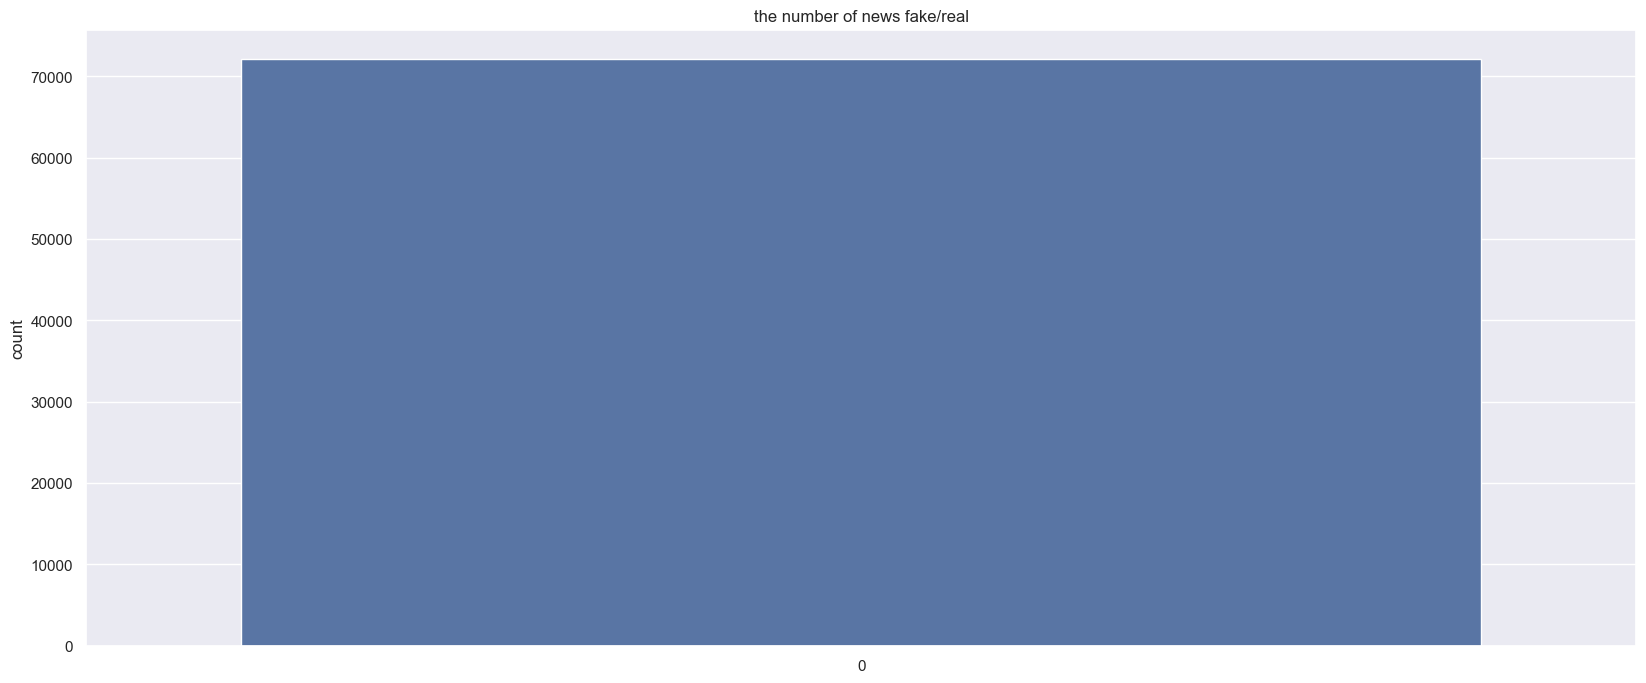

In [74]:
sns.countplot(df.label)
plt.title('the number of news fake/real');